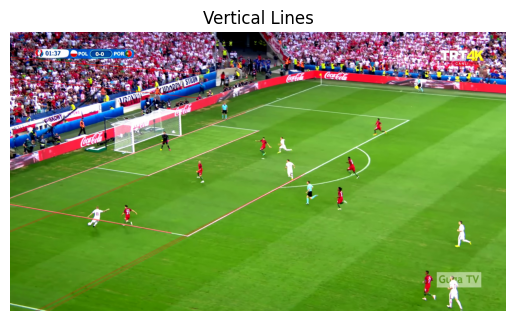

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_vertical_lines(image):
    img = image.copy()
    lines = None

    BlueRedMask = 100
    minLineLength = 1
    maxLineGap = 1250

    while lines is None or len(lines) == 0:
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (35, BlueRedMask, BlueRedMask), (70, 255, 255))
        imask = mask > 0
        green = np.zeros_like(img, np.uint8)
        green[imask] = img[imask]
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(green, 150, 250, apertureSize=3)

        lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

        if lines is None or len(lines) == 0:
            BlueRedMask -= 10

    for line in lines:
        for r, theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * r
            y0 = b * r
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)

    return img

def get_horizontal_lines(image):
    img = image
    lines = []

    BlueRedMask = 100
    minLineLength = 1
    maxLineGap = 1250

    while not lines:
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (36, BlueRedMask, BlueRedMask), (100, 255, 255))
        imask = mask > 0
        green = np.zeros_like(img, np.uint8)
        green[imask] = img[imask]
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 150, 250, apertureSize=3)

        lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

        if not lines:
            BlueRedMask -= 10

    # Rysowanie wykrytych linii na obrazie
    for line in lines:
        for r, theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * r
            y0 = b * r
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 1)

    return image

input_image = cv2.imread('0.jpg')

if input_image is not None:
    output_image_vertical = get_vertical_lines(input_image.copy())

    plt.imshow(cv2.cvtColor(output_image_vertical, cv2.COLOR_BGR2RGB))
    plt.title('Vertical Lines')
    plt.axis('off')
    plt.show()
else:
    print("Błąd wczytywania obrazu.")



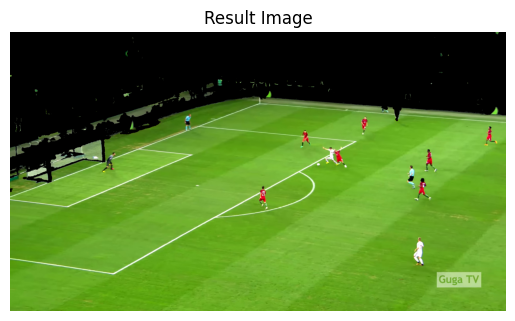

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_audience(image_path):
    image = cv2.imread(image_path)

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask_contours = np.zeros_like(mask)
    cv2.drawContours(mask_contours, contours, -1, (255), thickness=cv2.FILLED)

    result = cv2.bitwise_and(image, image, mask=mask_contours)

    return result

image_path = '1.jpg'

result_image = remove_audience(image_path)

plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Result Image')
plt.axis('off')
plt.show()
